In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./titanic/titanic-train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
X = df[['SibSp','Parch','Fare']]
y = df['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   891 non-null    int64  
 1   Parch   891 non-null    int64  
 2   Fare    891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


In [6]:
# split the data into train and test.
# 80% train and 20% test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   712 non-null    int64  
 1   Parch   712 non-null    int64  
 2   Fare    712 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.2 KB


In [8]:
from sklearn.tree import DecisionTreeClassifier

tree_clfl = DecisionTreeClassifier(criterion='entropy') # gini
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [18]:
# test the accuracy use k-fold across validation.
from sklearn.model_selection import cross_val_score
tree1_accu_scores = cross_val_score(tree_clfl, X_train, y_train, scoring='accuracy',cv=10)
tree2_accu_scores = cross_val_score(tree_clf2, X_train, y_train, scoring='accuracy',cv=10)

In [19]:
# 10 numbers are corresponding to each test scores.
print(tree1_accu_scores.mean())
print(tree2_accu_scores.mean())

0.6459898278560251
0.7106220657276995


In [20]:
# train the final model using ALLLLLL training data.
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
y_pred = tree_clf2.predict(X_test) # ground truth is in y_test

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.7150837988826816
0.7169811320754716
0.5135135135135135


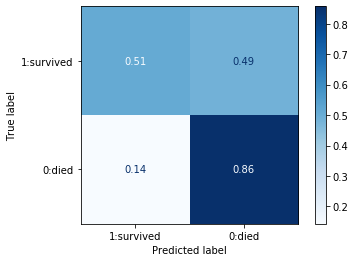

In [32]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['1:survived','0:died']

disp = plot_confusion_matrix(tree_clf2, X_test, y_test, labels=[1,0],
                             display_labels=class_names, cmap=plt.cm.Blues,
                            normalize='true')